# SMSSpamCollection
# Location : https://mitu.co.in/dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
load_doc('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg/cv000_29416.txt') #Demo

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [5]:
# turn a doc into clean token
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaning tokens that are not aplhatic
  tokens = [word for word in tokens if word.isalpha()]
  # Filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [6]:
text = load_doc('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg/cv000_29416.txt')
clean_doc(text)

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'whats',
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 'didnt',
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 'whats',
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',

In [7]:
# load doc, clean and return line of token
def doc_to_line(filename, vocab):
  # load the doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)

In [8]:
vocab = open('/content/drive/MyDrive/CDAC_DAI/NLP/vocab.txt', 'r')
vocab = set(vocab.read().split())

In [9]:
vocab

{'writingdirecting',
 'relaxing',
 'jordan',
 'masterminded',
 'pejorative',
 'couriers',
 'continent',
 'area',
 'method',
 'minivan',
 'shoreline',
 'stahl',
 'iv',
 'relatives',
 'chick',
 'convenient',
 'primordial',
 'twists',
 'motherdaughter',
 'padding',
 'natured',
 'actioner',
 'clips',
 'wellwritten',
 'hence',
 'ominously',
 'comforts',
 'neuroses',
 'attainable',
 'invariably',
 'cockroaches',
 'grodins',
 'chose',
 'badass',
 'housewife',
 'isolate',
 'starmaking',
 'bars',
 'visionaries',
 'impressed',
 'farleys',
 'hy',
 'thivisol',
 'popul',
 'ti',
 'manor',
 'kissner',
 'caulders',
 'reins',
 'exhibition',
 'vci',
 'ips',
 'requests',
 'unerotic',
 'commenting',
 'injected',
 'emperors',
 'deceit',
 'clever',
 'surrender',
 'champion',
 'han',
 'obligation',
 'hattie',
 'rumours',
 'gunplay',
 'tightly',
 'commit',
 'digitalized',
 'ingolstadt',
 'hurried',
 'fleshing',
 'tourdeforce',
 'beth',
 'chucky',
 'disappointment',
 'wong',
 'firefighters',
 'gymnasium',
 'ru

In [10]:
doc_to_line('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg/cv000_29416.txt', vocab)

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually 

In [11]:
# load all documents in a directory
def process_train(directory, vocab):
  document =list()
  for filename in listdir(directory):
    # create the full path of the file to open
    if not filename.startswith('cv9'):
      path = directory + '/' + filename
      # load and clean the doc
      doc = load_doc(path)
      tokens = clean_doc(doc)
      # add to list
      document.append(tokens)
  return document


  # load all documents in a directory
def process_test(directory, vocab):
  document =list()
  for filename in listdir(directory):
    # create the full path of the file to open
    if not filename.startswith('cv9'):
      path = directory + '/' + filename
      # load and clean the doc
      doc = load_doc(path)
      tokens = clean_doc(doc)
      # add to list
      document.append(tokens)
  return document







In [12]:
process_train('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg', vocab)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# load all doc in directory
def process_doc(directory, is_train):
  documents = list()
  for filename in listdir(directory):
    # skip any review in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load and clean the doc
    doc = load_doc(path)
    tokens = clean_doc(doc)
    # add to list
    documents.append(tokens)
  return documents

In [14]:
process_doc('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg', True)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
# load and clean a dataset
def load_clean_dataset(is_train):
  # load documents
  neg = process_doc('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/neg', is_train)
  pos = process_doc('/content/drive/MyDrive/CDAC_DAI/NLP/review_polarity/txt_sentoken/pos', is_train)
  documents = neg + pos
  # prepare labels
  labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
  return documents, labels

In [16]:
train, train_labels = load_clean_dataset(True)
test, test_labels = load_clean_dataset(False)

In [17]:
len(train), len(train_labels)

(1810, 1810)

In [18]:
len(test), len(test_labels)

(200, 200)

In [19]:
train_labels[100]

0

In [20]:
from collections import Counter
Counter(train_labels)

Counter({0: 910, 1: 900})

In [21]:
Counter(test_labels)

Counter({0: 100, 1: 100})

In [22]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [23]:
# create the tokenizer
tokenizer = create_tokenizer(train)

In [24]:
#encode data
x_train = tokenizer.texts_to_matrix(train)

In [25]:
x_train.shape

(1810, 44277)

In [26]:
x_train[100]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
tokenizer.word_index

{'film': 1,
 'one': 2,
 'movie': 3,
 'like': 4,
 'even': 5,
 'good': 6,
 'time': 7,
 'story': 8,
 'films': 9,
 'would': 10,
 'much': 11,
 'also': 12,
 'characters': 13,
 'get': 14,
 'character': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'make': 21,
 'really': 22,
 'little': 23,
 'life': 24,
 'plot': 25,
 'people': 26,
 'bad': 27,
 'scene': 28,
 'could': 29,
 'movies': 30,
 'never': 31,
 'best': 32,
 'new': 33,
 'scenes': 34,
 'man': 35,
 'many': 36,
 'doesnt': 37,
 'know': 38,
 'dont': 39,
 'hes': 40,
 'great': 41,
 'another': 42,
 'action': 43,
 'love': 44,
 'us': 45,
 'go': 46,
 'director': 47,
 'something': 48,
 'end': 49,
 'still': 50,
 'seems': 51,
 'back': 52,
 'made': 53,
 'theres': 54,
 'work': 55,
 'makes': 56,
 'however': 57,
 'world': 58,
 'years': 59,
 'big': 60,
 'every': 61,
 'though': 62,
 'better': 63,
 'enough': 64,
 'around': 65,
 'seen': 66,
 'take': 67,
 'performance': 68,
 'real': 69,
 'role': 70,
 'going': 71,
 'gets': 72,
 'think': 73,
 

In [28]:
#encode data
x_test = tokenizer.texts_to_matrix(test)

In [29]:
x_test.shape

(200, 44277)

Build the model

In [30]:
# define the model
def define_model(n_words):
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

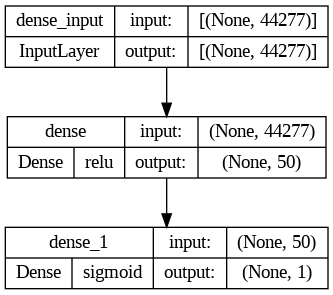

In [31]:
model = define_model(x_train.shape[1])
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2213900   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2213951 (8.45 MB)
Trainable params: 2213951 (8.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train Model

In [33]:
# fit network
model.fit(x_train, np.array(train_labels), epochs=10, batch_size=10)

Epoch 1/10
181/181 [==============================] - 3s 3ms/step - loss: 0.4211 - accuracy: 0.8039
Epoch 2/10
181/181 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9956
Epoch 3/10
181/181 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 4/10
181/181 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
181/181 [==============================] - 1s 3ms/step - loss: 8.3116e-04 - accuracy: 1.0000
Epoch 6/10
181/181 [==============================] - 1s 3ms/step - loss: 3.9747e-04 - accuracy: 1.0000
Epoch 7/10
181/181 [==============================] - 1s 3ms/step - loss: 2.3104e-04 - accuracy: 1.0000
Epoch 8/10
181/181 [==============================] - 1s 3ms/step - loss: 1.5172e-04 - accuracy: 1.0000
Epoch 9/10
181/181 [==============================] - 1s 3ms/step - loss: 1.0769e-04 - accuracy: 1.0000
Epoch 10/10
181/181 [==============================] - 1s 3ms/step - loss: 8.000

Evaluate on test data

In [35]:
model.evaluate(x_test, np.array(test_labels), batch_size=1)

200/200 [==============================] - 1s 5ms/step - loss: 0.2650 - accuracy: 0.9100


[0.26495468616485596, 0.9100000262260437]

Predict on unseen data

In [46]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie. Please dont watch it.'

In [43]:
# create the tokenizer
tokenizer1 = create_tokenizer(text1)
tokenizer2 = create_tokenizer(text2)


In [47]:
#encode data
x_text1 = tokenizer1.texts_to_matrix(text1)
#encode data
x_text2 = tokenizer2.texts_to_matrix(text2)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 44277), found shape=(None, 19)


In [49]:
# Classify a revew as negative or positive
def predict_sentiment(review):
  # clean the data
  tokens = clean_doc(review)
  # create the string
  line = ' '.join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode='binary')
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrive pridicted percentage and leabel
  percentage_pos = yhat[0][0]
  if round(percentage_pos) == 0:
    return (1-percentage_pos), 'NEGATIVE'
  return percentage_pos, 'POSITIVE'

In [50]:
predict_sentiment(text1)

(0.68670213, 'POSITIVE')

In [51]:
predict_sentiment(text2)

(0.6685094237327576, 'NEGATIVE')